# Import Library

In [2]:
!pip install dataprep


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation
%matplotlib inline
pd.set_option('display.max_columns', 500)
import plotly.express as px

from sklearn.cluster import KMeans

In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Import Dataset

In [5]:
df = pd.read_csv('universal_top_spotify_songs.csv')
df.head()

spotify_id                   name         artists  daily_rank  \
0  3rUGC1vUpkDG9CZFHMur1t                 greedy      Tate McRae           1   
1  2KslE17cAJNHTsI2MI0jb2   Standing Next to You       Jung Kook           2   
2  2HafqoJbgXdtjwCOvNEF14            Si No Estás  iñigo quintero           3   
3  1BxfuPKGuaTgP7aM0Bbdwr           Cruel Summer    Taylor Swift           4   
4  3vkCueOmm7xQDoJ17W1Pm3  My Love Mine All Mine          Mitski           5   

   daily_movement  weekly_movement country snapshot_date  popularity  \
0               0                1     NaN    2023-11-15         100   
1               0               -1     NaN    2023-11-15          95   
2               1                0     NaN    2023-11-15          99   
3              -1                3     NaN    2023-11-15          99   
4               1                5     NaN    2023-11-15          97   

   is_explicit  duration_ms                              album_name  \
0         True       131872                                  greedy   
1        False       206019                                  GOLDEN   
2        False       184061                             Si No Estás   
3        False       178426                                   Lover   
4        False       137773  The Land Is Inhospitable and So Are We   

  album_release_date  danceability  energy  key  loudness  mode  speechiness  \
0         2023-09-15         0.750   0.733    6    -3.180     0       0.0319   
1         2023-11-03         0.711   0.809    2    -4.389     0       0.0955   
2         2022-09-23         0.537   0.421    5    -8.720     1       0.0285   
3         2019-08-23         0.552   0.702    9    -5.707     1       0.1570   
4         2023-09-15         0.504   0.308    9   -14.958     1       0.0321   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0        0.2560          0.000000     0.114    0.844  111.018               1  
1        0.0447          0.000000     0.339    0.816  106.017               4  
2        0.8270          0.000000     0.138    0.524   98.224               4  
3        0.1170          0.000021     0.105    0.564  169.994               4  
4        0.8680          0.135000     0.158    0.121  113.950               4

Dataset: Top Spotify Songs in 73 Countries <br> <br>

spotify_id: The unique identifier for the song in the Spotify database. (type: str) <br>
name: The title of the song. (type: str) <br>
artists: The name(s) of the artist(s) associated with the song. (type: str) <br>
daily_rank: The daily rank of the song in the top 50 list. (type: int) <br>
daily_movement: The change in rankings compared to the previous day. (type: int) <br>
weekly_movement: The change in rankings compared to the previous week. (type: int)<br>
country: The ISO code of the country of the Top 50 Playlist. If Null, then the playlist if 'unknown country'. (type: str) <br>
snapshot_date: The date on which the data was collected from the Spotify API. (type: str) <br>
popularity: A measure of the song's current popularity on Spotify. (type: int) <br>
is_explicit: Indicates whether the song contains explicit lyrics. (type: bool)<br>
duration_ms: The duration of the song in milliseconds. (type: int) <br>
album_name: The title of the album the song belongs to. (type: str) <br>
album_release_date: The release date of the album the song belongs to. (type: str) <br>
danceability: A measure of how suitable the song is for dancing based on various musical elements. (type: float) <br>
energy: A measure of the intensity and activity level of the song. (type: float) <br>
key: The key of the song. (type: int) <br>
loudness: The overall loudness of the song in decibels. (type: float) <br>
mode: Indicates whether the song is in a major or minor key. (type: int) <br>
speechiness: A measure of the presence of spoken words in the song. (type: float) <br>
acousticness: A measure of the acoustic quality of the song. (type: float) <br>
instrumentalness: A measure of the likelihood that the song does not contain vocals. (type: float) <br>
liveness: A measure of the presence of a live audience in the recording. (type: float) <br>
valence: A measure of the musical positiveness conveyed by the song. (type: float) <br>
tempo: The tempo of the song in beats per minute. (type: float) <br>
time_signature: The estimated overall time signature of the song. (type: int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105669 entries, 0 to 105668
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          105669 non-null  object 
 1   name                105648 non-null  object 
 2   artists             105648 non-null  object 
 3   daily_rank          105669 non-null  int64  
 4   daily_movement      105669 non-null  int64  
 5   weekly_movement     105669 non-null  int64  
 6   country             104217 non-null  object 
 7   snapshot_date       105669 non-null  object 
 8   popularity          105669 non-null  int64  
 9   is_explicit         105669 non-null  bool   
 10  duration_ms         105669 non-null  int64  
 11  album_name          105647 non-null  object 
 12  album_release_date  105647 non-null  object 
 13  danceability        105669 non-null  float64
 14  energy              105669 non-null  float64
 15  key                 105669 non-nul

# Data Cleaning

In [7]:
# Mengisi null di kolom country dengan 'unknown country'
df['country'].fillna('unknown country', inplace=True)
df.head()

spotify_id                   name         artists  daily_rank  \
0  3rUGC1vUpkDG9CZFHMur1t                 greedy      Tate McRae           1   
1  2KslE17cAJNHTsI2MI0jb2   Standing Next to You       Jung Kook           2   
2  2HafqoJbgXdtjwCOvNEF14            Si No Estás  iñigo quintero           3   
3  1BxfuPKGuaTgP7aM0Bbdwr           Cruel Summer    Taylor Swift           4   
4  3vkCueOmm7xQDoJ17W1Pm3  My Love Mine All Mine          Mitski           5   

   daily_movement  weekly_movement          country snapshot_date  popularity  \
0               0                1  unknown country    2023-11-15         100   
1               0               -1  unknown country    2023-11-15          95   
2               1                0  unknown country    2023-11-15          99   
3              -1                3  unknown country    2023-11-15          99   
4               1                5  unknown country    2023-11-15          97   

   is_explicit  duration_ms                              album_name  \
0         True       131872                                  greedy   
1        False       206019                                  GOLDEN   
2        False       184061                             Si No Estás   
3        False       178426                                   Lover   
4        False       137773  The Land Is Inhospitable and So Are We   

  album_release_date  danceability  energy  key  loudness  mode  speechiness  \
0         2023-09-15         0.750   0.733    6    -3.180     0       0.0319   
1         2023-11-03         0.711   0.809    2    -4.389     0       0.0955   
2         2022-09-23         0.537   0.421    5    -8.720     1       0.0285   
3         2019-08-23         0.552   0.702    9    -5.707     1       0.1570   
4         2023-09-15         0.504   0.308    9   -14.958     1       0.0321   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0        0.2560          0.000000     0.114    0.844  111.018               1  
1        0.0447          0.000000     0.339    0.816  106.017               4  
2        0.8270          0.000000     0.138    0.524   98.224               4  
3        0.1170          0.000021     0.105    0.564  169.994               4  
4        0.8680          0.135000     0.158    0.121  113.950               4

In [8]:
# check missing values per column
df.isna().sum()

spotify_id             0
name                  21
artists               21
daily_rank             0
daily_movement         0
weekly_movement        0
country                0
snapshot_date          0
popularity             0
is_explicit            0
duration_ms            0
album_name            22
album_release_date    22
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

0

1. Terdapat missing values, paling banyak sejumlah 22 yaitu di kolom album_name dan album_release_date. Karena jumlahnya sedikit (tidak mencapai 50% dari seluruh data), maka akan didrop. <br>
2. Tidak terdapat duplicated data.

In [10]:
# check missing values per column

df.dropna(inplace=True)
df.isna().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

Sudah tidak ada missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105647 entries, 0 to 105668
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          105647 non-null  object 
 1   name                105647 non-null  object 
 2   artists             105647 non-null  object 
 3   daily_rank          105647 non-null  int64  
 4   daily_movement      105647 non-null  int64  
 5   weekly_movement     105647 non-null  int64  
 6   country             105647 non-null  object 
 7   snapshot_date       105647 non-null  object 
 8   popularity          105647 non-null  int64  
 9   is_explicit         105647 non-null  bool   
 10  duration_ms         105647 non-null  int64  
 11  album_name          105647 non-null  object 
 12  album_release_date  105647 non-null  object 
 13  danceability        105647 non-null  float64
 14  energy              105647 non-null  float64
 15  key                 105647 non-nul

# EDA

In [12]:
categoricals = ['spotify_id','name','artists','country','snapshot_date','is_explicit','album_name','album_release_date']
numericals = ['daily_rank','daily_movement','weekly_movement','popularity','duration_ms','danceability','energy',
              'key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
              'time_signature']

In [13]:
# describe method on categorical data
df[categoricals].describe().T

count unique                                  top   freq
spotify_id          105647   3165               3rUGC1vUpkDG9CZFHMur1t   1271
name                105647   3062                               greedy   1271
artists             105647   2258                         Taylor Swift   4469
country             105647     73                                   ZA   1455
snapshot_date       105647     29                           2023-10-27   3766
is_explicit         105647      2                                False  65364
album_name          105647   2413  nadie sabe lo que va a pasar mañana   5913
album_release_date  105647    788                           2023-10-13   8362

In [14]:
# numerical statistical sumary
df[numericals].describe().T

count           mean           std           min  \
daily_rank        105647.0      25.474202     14.426857      1.000000   
daily_movement    105647.0       1.282431      7.944407    -46.000000   
weekly_movement   105647.0       6.610192     15.232266    -46.000000   
popularity        105647.0      77.527256     17.156095      0.000000   
duration_ms       105647.0  194401.793302  48604.942046  34285.000000   
danceability      105647.0       0.690273      0.135020      0.187000   
energy            105647.0       0.647406      0.161573      0.012400   
key               105647.0       5.407451      3.486201      0.000000   
loudness          105647.0      -6.620190      2.658892    -31.042000   
mode              105647.0       0.503933      0.499987      0.000000   
speechiness       105647.0       0.106797      0.098760      0.023200   
acousticness      105647.0       0.283256      0.254630      0.000008   
instrumentalness  105647.0       0.018164      0.093590      0.000000   
liveness          105647.0       0.171804      0.123575      0.015400   
valence           105647.0       0.529590      0.227949      0.027100   
tempo             105647.0     121.686182     27.652593     47.914000   
time_signature    105647.0       3.909898      0.431619      1.000000   

                          25%            50%            75%         max  
daily_rank            13.0000      25.000000      38.000000      50.000  
daily_movement        -1.0000       0.000000       2.000000      49.000  
weekly_movement       -2.0000       1.000000      12.000000      49.000  
popularity            66.0000      82.000000      90.000000     100.000  
duration_ms       162767.0000  188000.000000  220116.000000  641941.000  
danceability           0.5980       0.706000       0.796000       0.974  
energy                 0.5460       0.670000       0.759000       0.997  
key                    2.0000       6.000000       8.000000      11.000  
loudness              -8.0510      -6.197000      -4.850000       1.155  
mode                   0.0000       1.000000       1.000000       1.000  
speechiness            0.0408       0.064100       0.135000       0.912  
acousticness           0.0810       0.190000       0.440000       0.996  
instrumentalness       0.0000       0.000002       0.000091       0.968  
liveness               0.0975       0.120000       0.211000       0.968  
valence                0.3600       0.524000       0.715000       0.978  
tempo                 99.9690     119.949000     140.014000     217.969  
time_signature         4.0000       4.000000       4.000000       5.000

Univariate Analysis


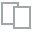
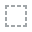
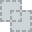
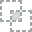
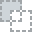
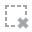
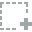
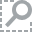
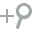
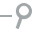
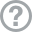
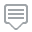
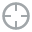
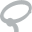
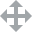
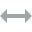
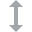
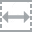
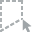
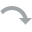
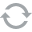
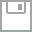
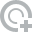
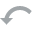
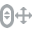
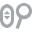
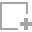
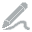
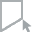
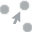
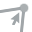
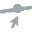

In [15]:
plot(df.drop(columns='spotify_id'))

In [16]:
numericals1 = ['daily_rank','daily_movement','weekly_movement','popularity','duration_ms','danceability','energy',
              'key']
numericals2 = ['loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
              'time_signature']

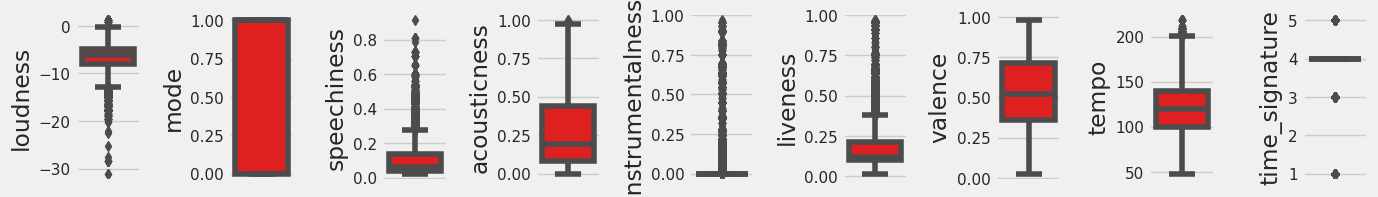

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(14,8))

# plotting
features2 = numericals2
for i in range(0, len(features2)):
    plt.subplot(4, len(features2), i+1)
    sns.boxplot(y=df[features2[i]], color='red')
    plt.tight_layout()

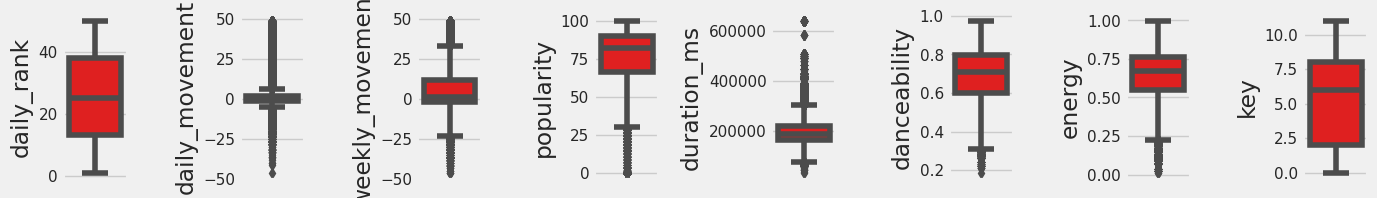

In [18]:
# adjust the figure size for better readability
plt.figure(figsize=(14,8))

# plotting
features1 = numericals1
for i in range(0, len(features1)):
    plt.subplot(4, len(features1), i+1)
    sns.boxplot(y=df[features1[i]], color='red')
    plt.tight_layout()



*   Terdapat outlier di kolom : <br>
daily_movement, weekly_movement, popularity, duration_ms, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, tempo, time signature.
*   Check jumlah outlier di kolom-kolom tersebut.



In [19]:
# Fungsi untuk menghitung outlier berdasarkan IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()


In [20]:
# Hitung jumlah outlier untuk kolom 'daily_movement'
outliers_count1 = count_outliers_iqr(df['daily_movement'])

print(f"Jumlah outlier: {(outliers_count1/105647)*100}")

Jumlah outlier: 15.579240300245157


Outlier > 5% karena ada beberapa lagu yang perubahan rankingnya drastis

In [21]:
# Hitung jumlah outlier untuk kolom 'weekly_movement'
outliers_count2 = count_outliers_iqr(df['weekly_movement'])

print(f"Jumlah outlier: {(outliers_count2/105647)*100}")

Jumlah outlier: 10.145105871439796


Outlier > 5% karena ada beberapa lagu yang perubahan rankingnya drastis

In [22]:
# Hitung jumlah outlier untuk kolom 'popularity'
outliers_count3 = count_outliers_iqr(df['popularity'])

print(f"Jumlah outlier: {(outliers_count3/105647)*100}")

Jumlah outlier: 1.6233305252397134


In [23]:
# Hitung jumlah outlier untuk kolom 'duration_ms'
outliers_count4 = count_outliers_iqr(df['duration_ms'])

print(f"Jumlah outlier: {(outliers_count4/105647)*100}")

Jumlah outlier: 2.6172063570191297


In [24]:
# Hitung jumlah outlier untuk kolom 'danceability'
outliers_count5 = count_outliers_iqr(df['danceability'])

print(f"Jumlah outlier: {(outliers_count5/105647)*100}")

Jumlah outlier: 0.35306255738449743


In [25]:
# Hitung jumlah outlier untuk kolom 'energy'
outliers_count6 = count_outliers_iqr(df['energy'])

print(f"Jumlah outlier: {(outliers_count6/105647)*100}")

Jumlah outlier: 1.47472242467841


In [26]:
# Hitung jumlah outlier untuk kolom 'loudness'
outliers_count7 = count_outliers_iqr(df['loudness'])

print(f"Jumlah outlier: {(outliers_count7/105647)*100}")

Jumlah outlier: 3.082908175338628


In [27]:
# Hitung jumlah outlier untuk kolom 'speechiness'
outliers_count8 = count_outliers_iqr(df['speechiness'])

print(f"Jumlah outlier: {(outliers_count8/105647)*100}")

Jumlah outlier: 8.276619307694492


Outlier > 5% karena ada beberapa lagu yang ukuran keberadaan kata-kata yang diucapkan dalam lagunya berbeda jauh dari lagu2 yang lain.

In [28]:
# Hitung jumlah outlier untuk kolom 'acousticness'
outliers_count9 = count_outliers_iqr(df['acousticness'])

print(f"Jumlah outlier: {(outliers_count9/105647)*100}")

Jumlah outlier: 0.044487775327269115


In [29]:
# Hitung jumlah outlier untuk kolom ' instrumentalness'
outliers_count10 = count_outliers_iqr(df['instrumentalness'])

print(f"Jumlah outlier: {(outliers_count10/105647)*100}")

Jumlah outlier: 21.699622327183924


Outlier > 5% karena ada beberapa lagu yang ukuran kemungkinan bahwa lagu tersebut tidak mengandung vokal nya berbeda jauh dari lagu2 yang lain.

In [30]:
# Hitung jumlah outlier untuk kolom ' liveness'
outliers_count11 = count_outliers_iqr(df['liveness'])

print(f"Jumlah outlier: {(outliers_count11/105647)*100}")

Jumlah outlier: 6.251952256098138


Outlier > 5% karena ada beberapa lagu yang ukuran kehadiran audiens langsung dalam rekaman nya berbeda jauh dari lagu2 lainnya.

In [31]:
# Hitung jumlah outlier untuk kolom 'tempo'
outliers_count12 = count_outliers_iqr(df['tempo'])

print(f"Jumlah outlier: {(outliers_count12/105647)*100}")

Jumlah outlier: 0.35400910579571593


In [32]:
# Hitung jumlah outlier untuk kolom 'time_signature'
outliers_count13 = count_outliers_iqr(df['time_signature'])

print(f"Jumlah outlier: {(outliers_count13/105647)*100}")

Jumlah outlier: 7.620661258720077


Outlier > 5% karena ada beberapa lagu yang perkiraan tanda birama keseluruhan lagu nya berbeda jauh dengan lagu2 lainnya.

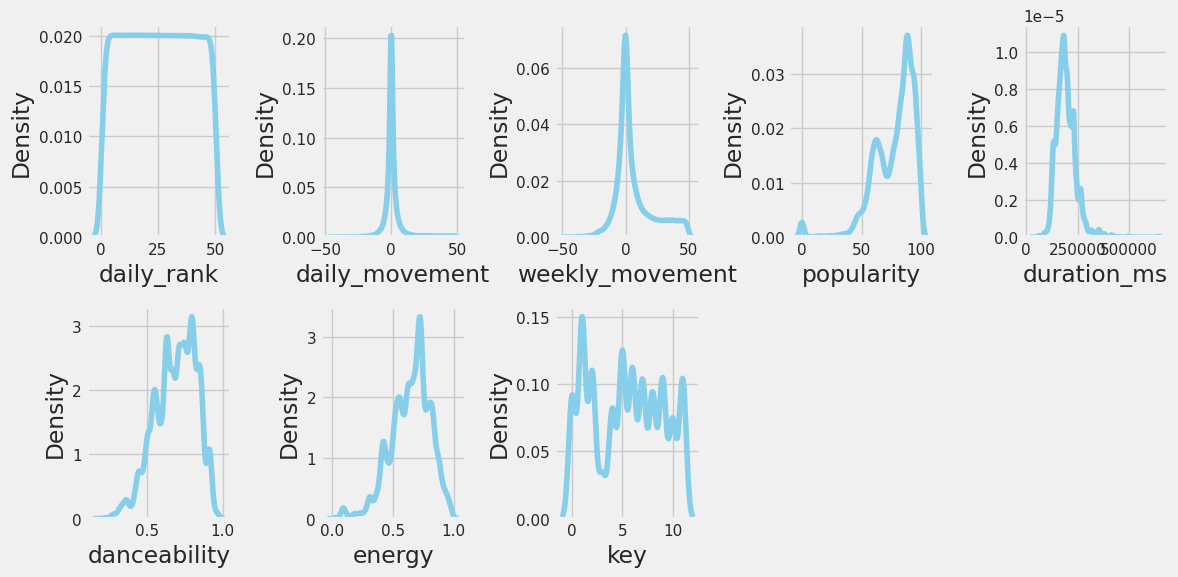

In [33]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features1 = numericals1
for i in range(0, len(features1)):
    plt.subplot(2, len(features1)//2 + 1, i+1)
    sns.kdeplot(x=df[features1[i]], color='skyblue')
    plt.xlabel(features1[i])
    plt.tight_layout()

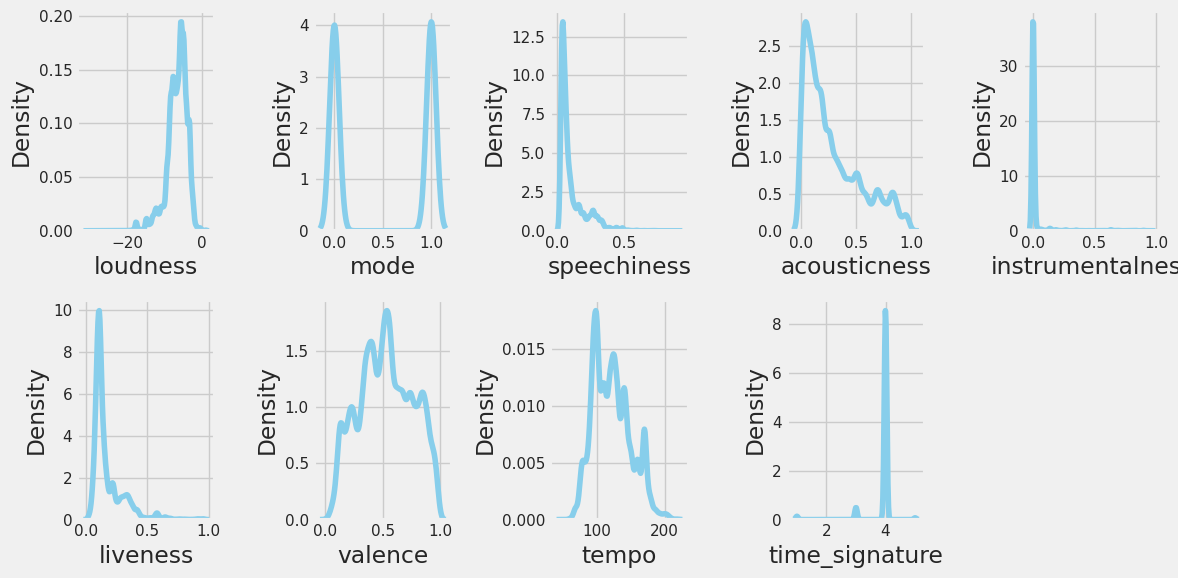

In [34]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features2 = numericals2
for i in range(0, len(features2)):
    plt.subplot(2, len(features2)//2 + 1, i+1)
    sns.kdeplot(x=df[features2[i]], color='skyblue')
    plt.xlabel(features2[i])
    plt.tight_layout()

Multivariate Anaylisis

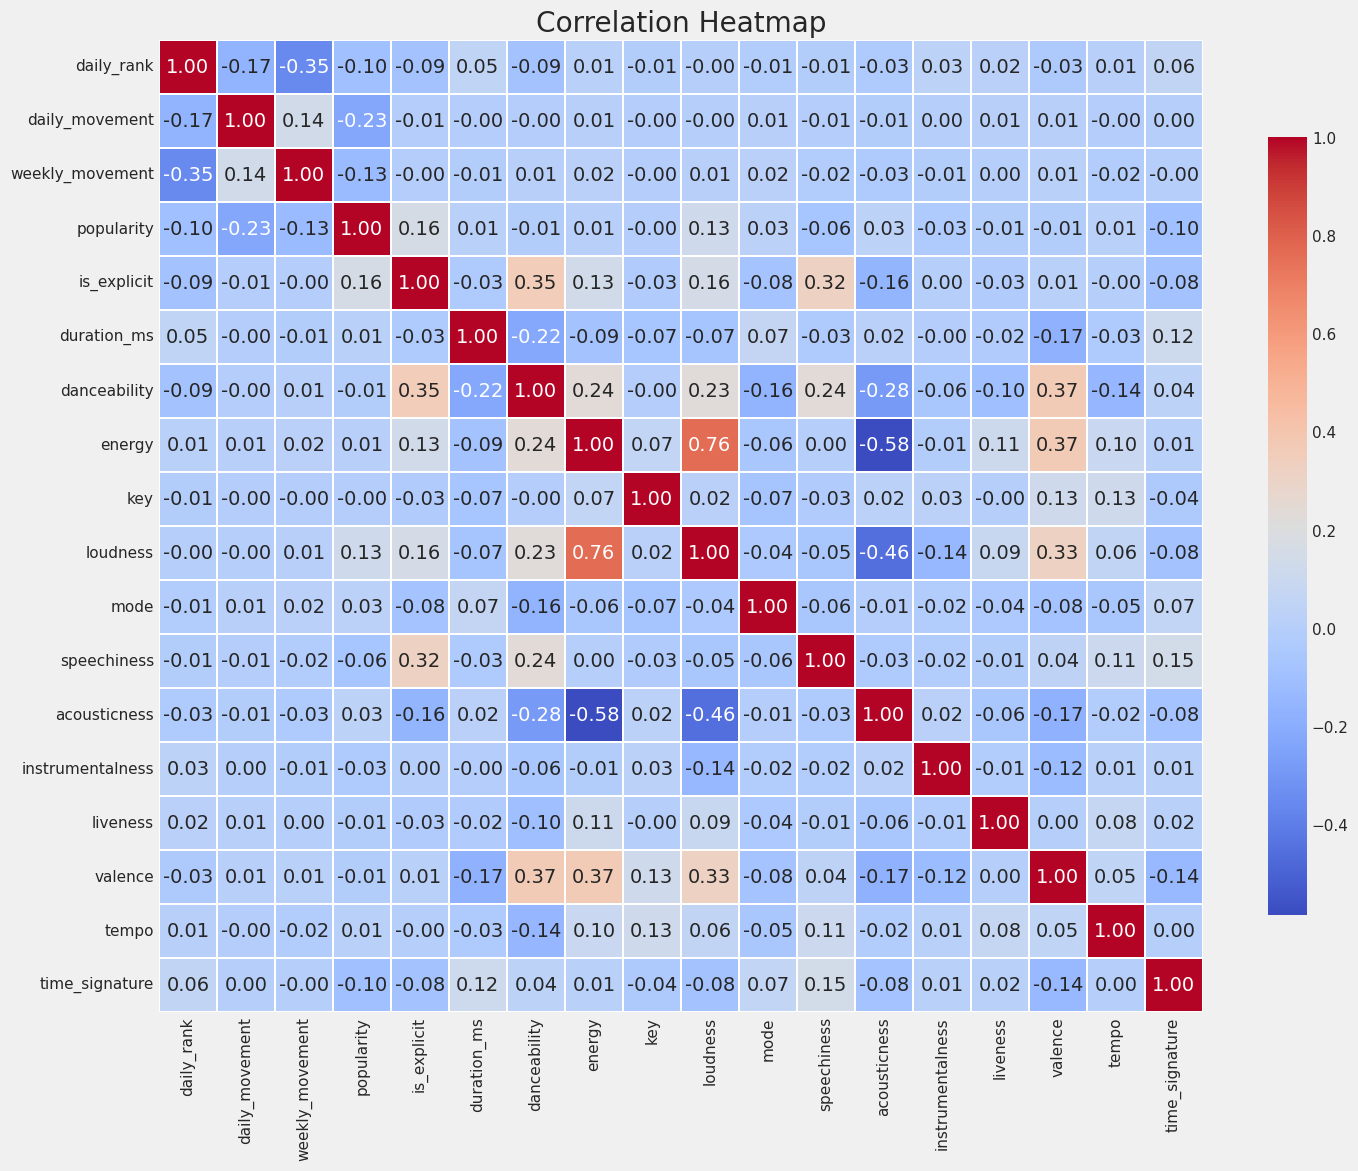

In [35]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.20, fmt=".2f", cbar_kws={'shrink': 0.8})

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

energy dan loudness memiliki korelasi yang sangat kuat -> 0.76 <br>
selanjutnya akan dianalisis clustering yang memiliki energy dan loudness tinggi -> genre rock

Beberapa fitur yang mungkin memiliki pengaruh pada jenis musik rock termasuk:

Energy:
        Musik rock cenderung memiliki tingkat energi yang tinggi.

Loudness:
        Musik rock sering kali memiliki tingkat kekerasan yang tinggi, tercermin dalam nilai loudness.

Tempo:
        Musik rock dapat memiliki tempo yang bervariasi, tetapi beberapa subgenre rock cenderung memiliki tempo yang cepat.

Valence:
        Beberapa jenis musik rock, terutama rock yang lebih keras, mungkin memiliki nilai valence yang lebih rendah.

Mode:
        Mode musik (major atau minor) dapat memberikan nuansa yang berbeda pada jenis musik tertentu. Beberapa subgenre rock mungkin lebih cenderung ke mode minor.

In [42]:
# Assume features of interest
features_of_interest = ['energy', 'loudness', 'tempo', 'valence', 'mode']


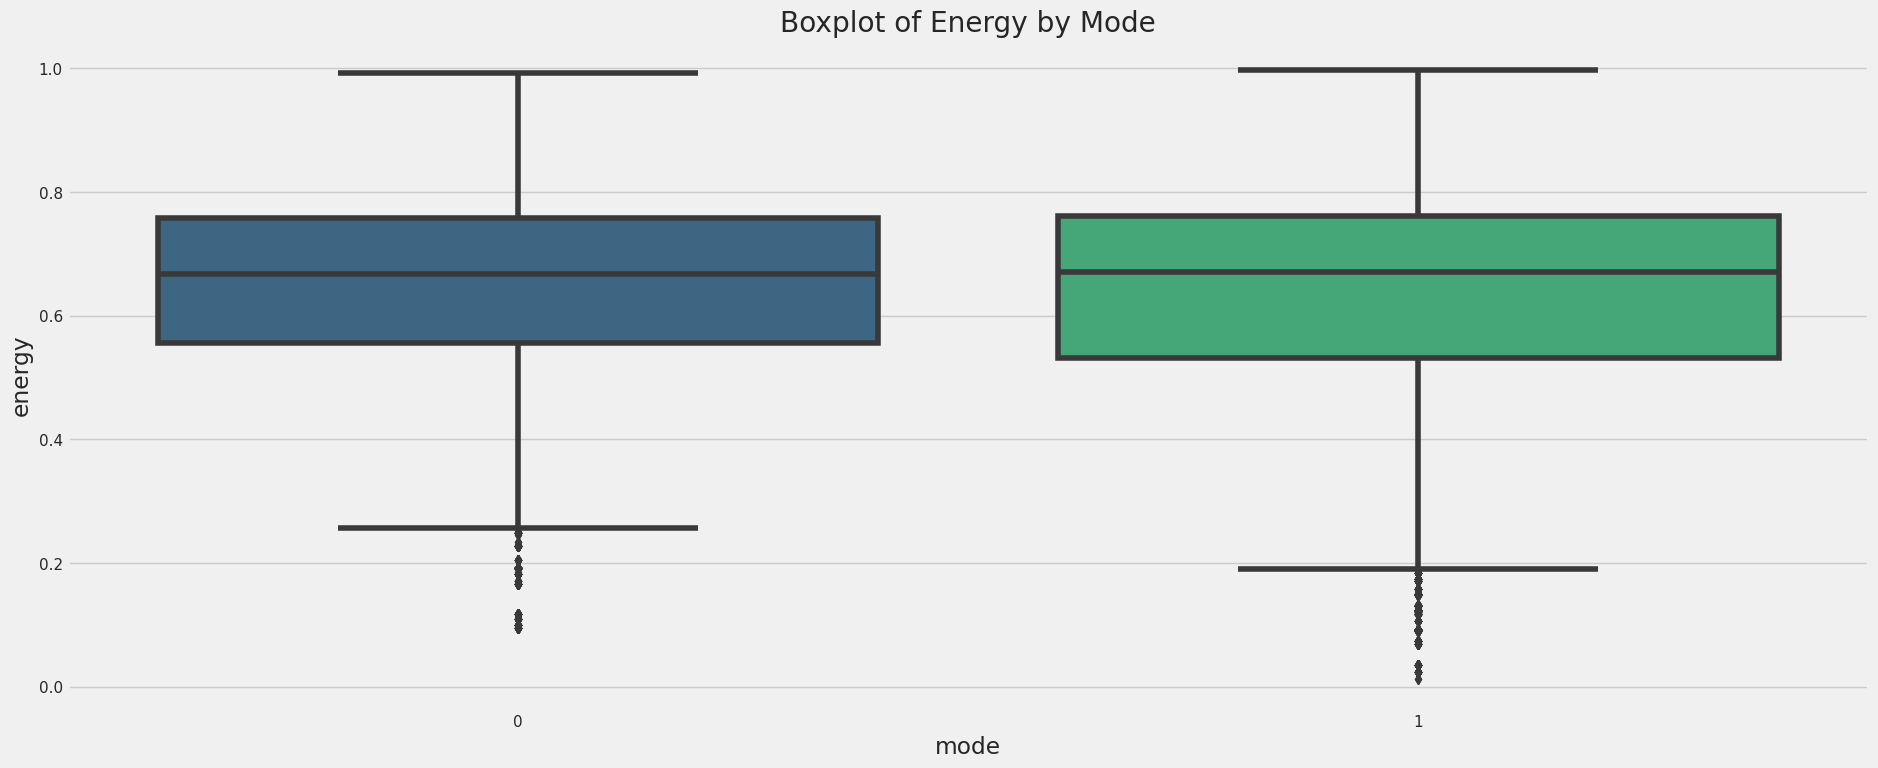

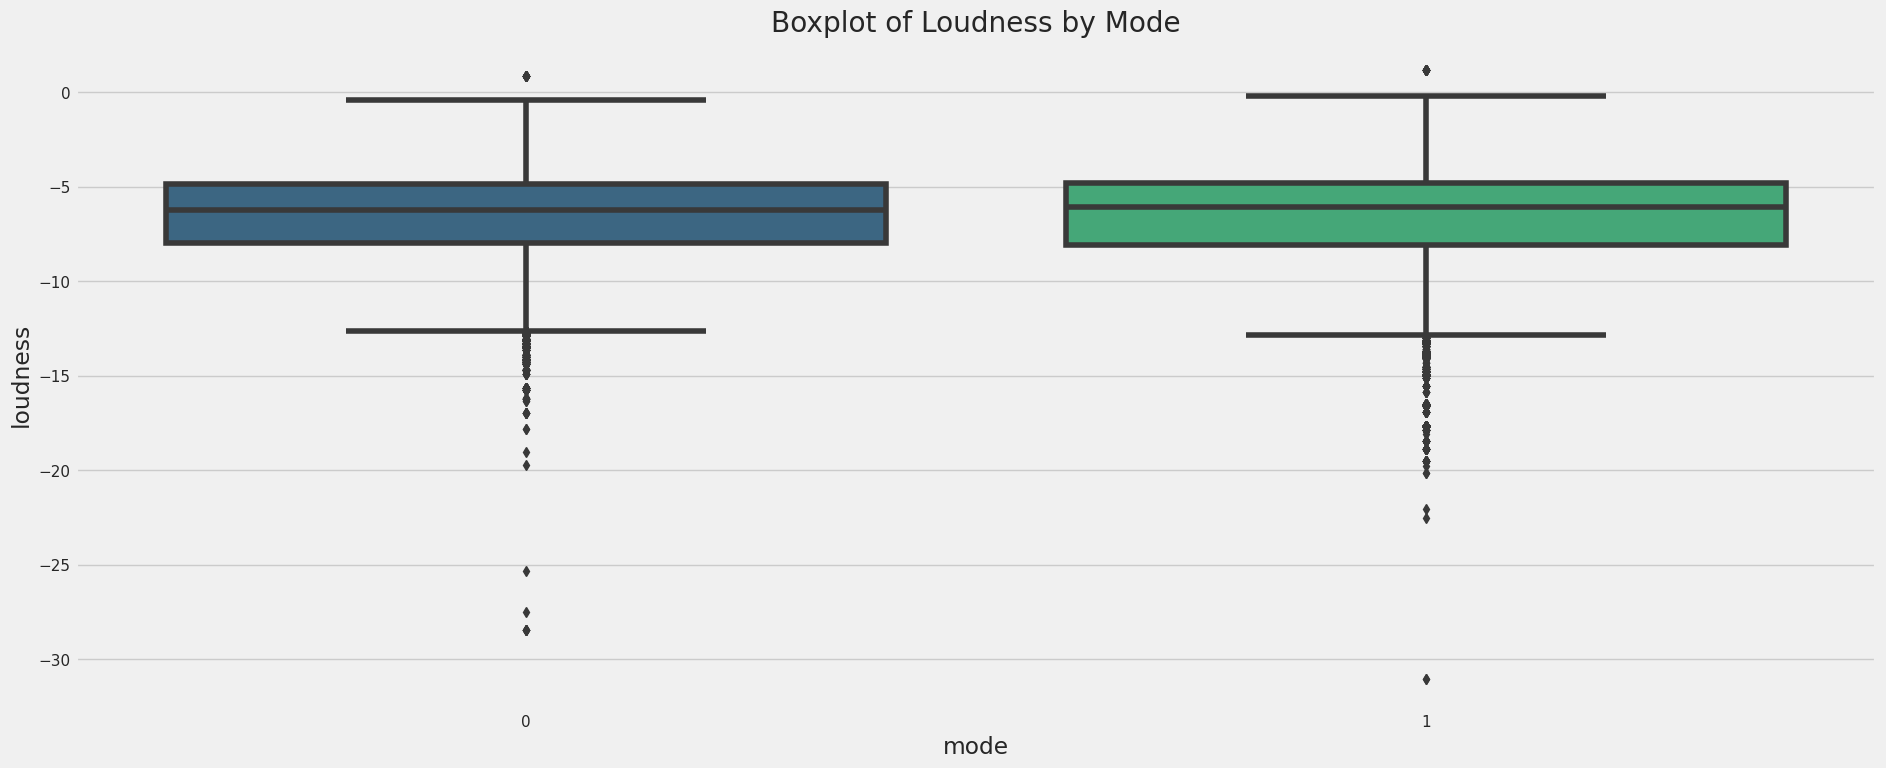

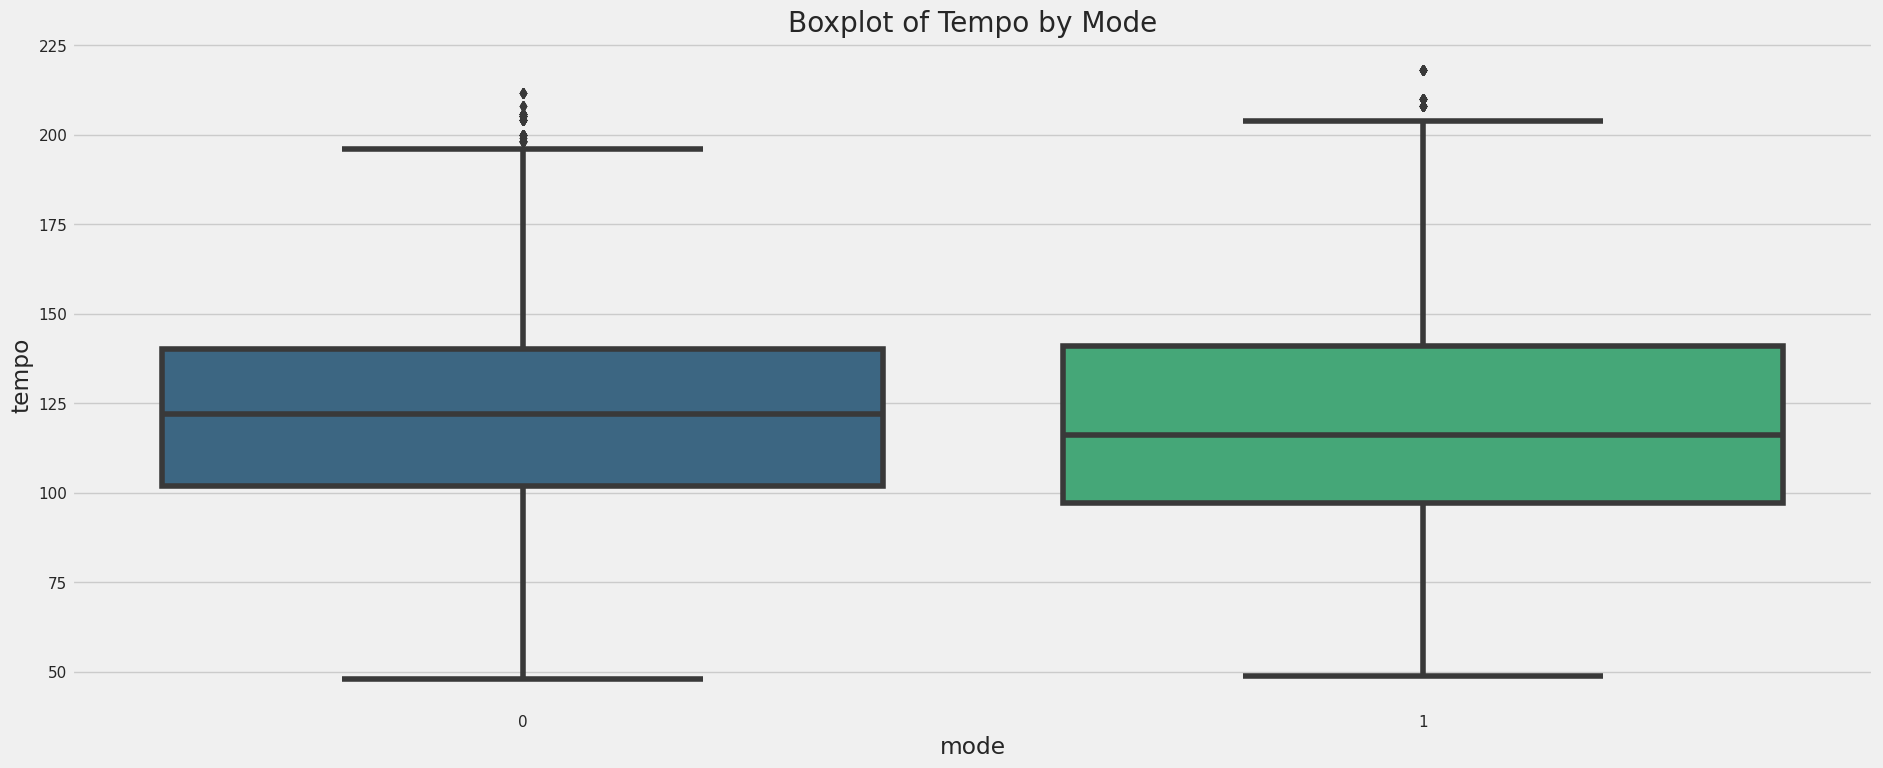

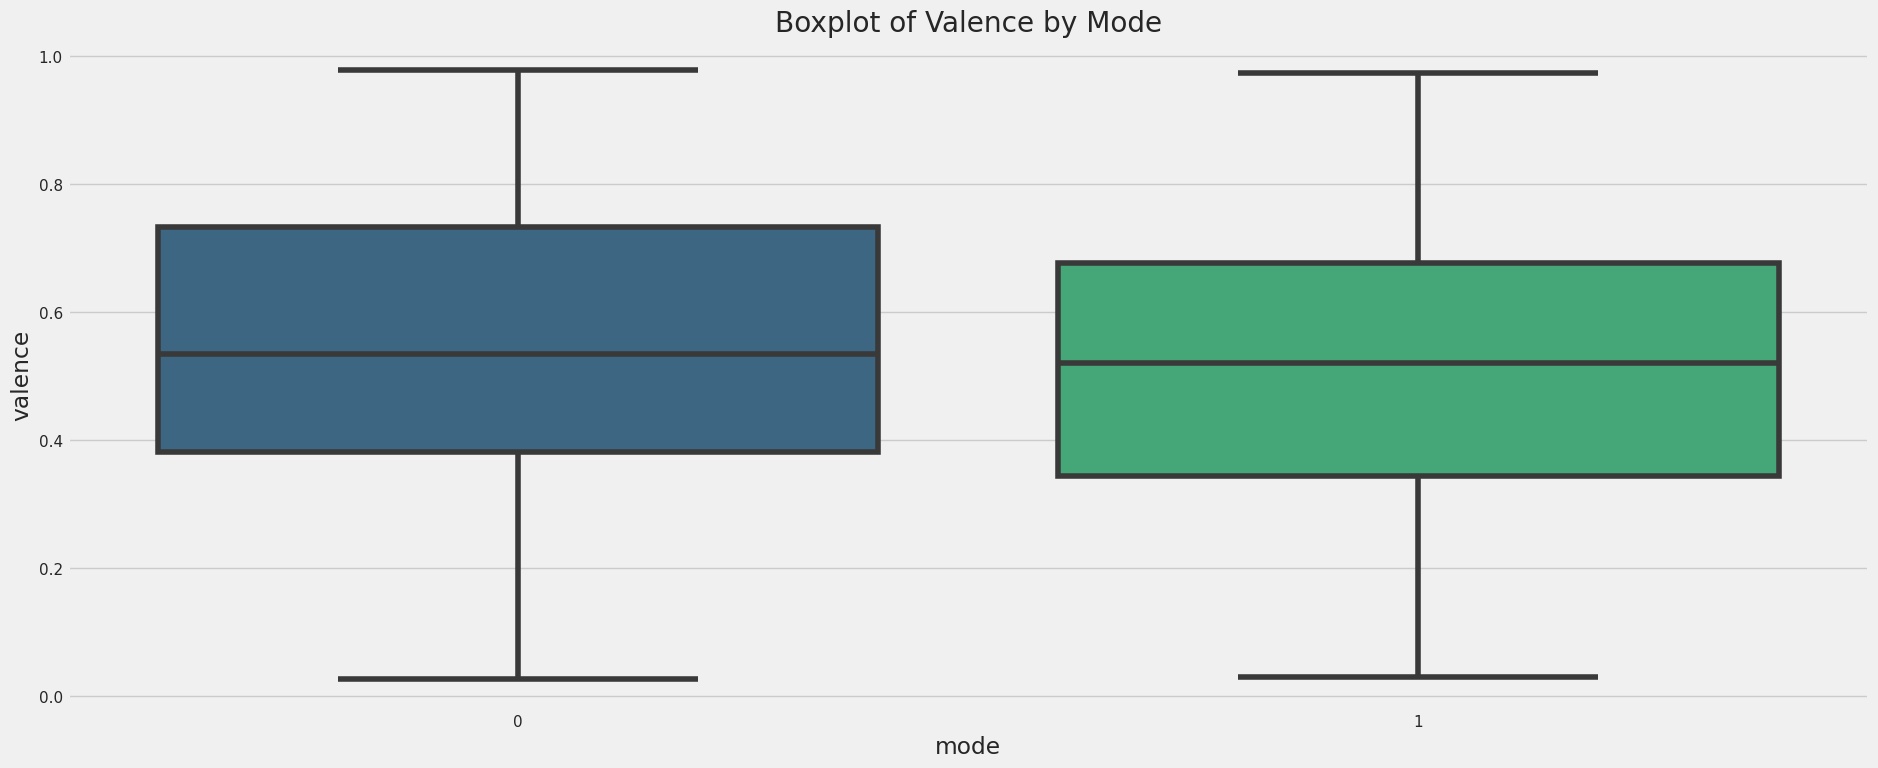

In [43]:
# Box plot for relationship between mode and features_of_interest except mode

sns.boxplot(data=df[features_of_interest], x='mode', y='energy', palette='viridis')
plt.title('Boxplot of Energy by Mode')
plt.show()

sns.boxplot(data=df[features_of_interest], x='mode', y='loudness', palette='viridis')
plt.title('Boxplot of Loudness by Mode')
plt.show()

sns.boxplot(data=df[features_of_interest], x='mode', y='tempo', palette='viridis')
plt.title('Boxplot of Tempo by Mode')
plt.show()

sns.boxplot(data=df[features_of_interest], x='mode', y='valence', palette='viridis')
plt.title('Boxplot of Valence by Mode')
plt.show()

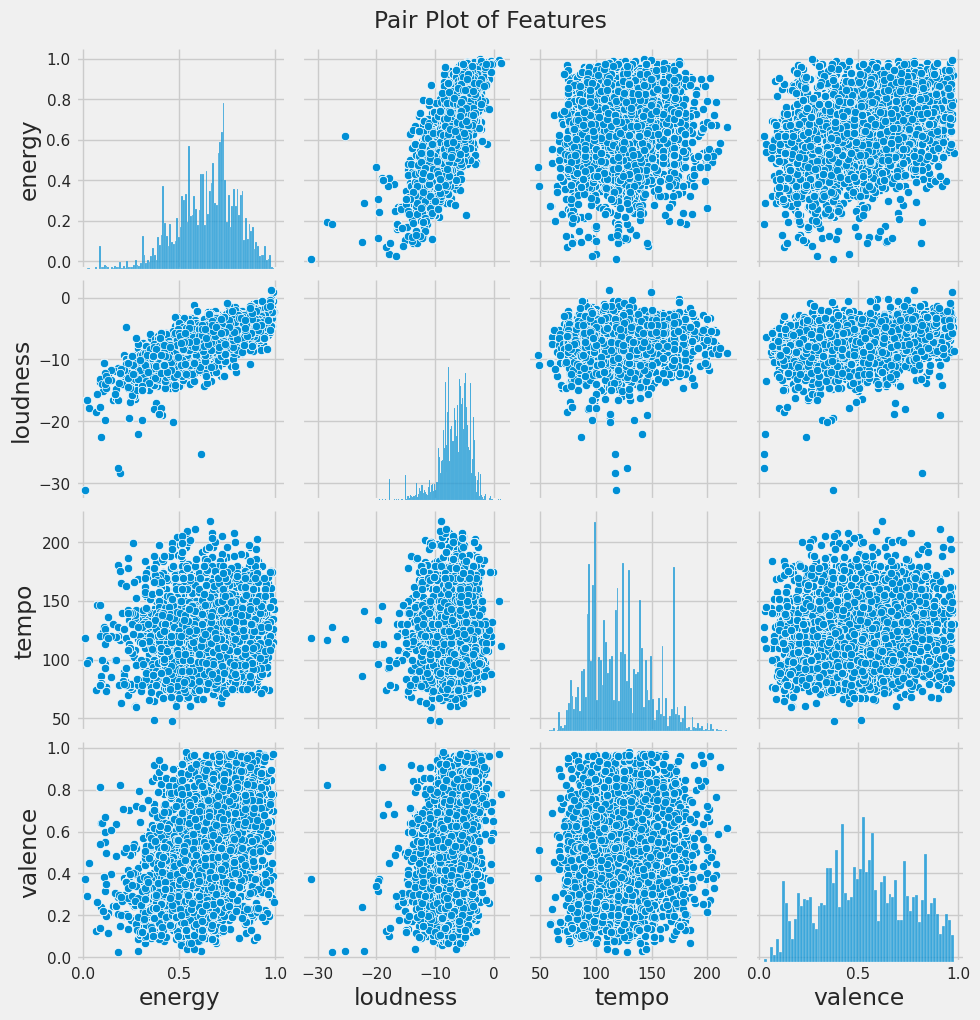

In [41]:
# Pair plot for pairwise relationships
sns.pairplot(df[['energy', 'loudness', 'tempo', 'valence']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


Berdasarkan gambar, dapat dilihat bahwa ada hubungan antara beberapa variabel. Misalnya, energi dan kerasnya suara berkorelasi positif, yang berarti bahwa lagu dengan energi yang tinggi cenderung memiliki kerasnya suara yang tinggi juga. Tempo dan valensi juga berkorelasi positif, yang berarti bahwa lagu dengan tempo yang cepat cenderung memiliki valensi yang tinggi juga.

# Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Select relevant columns for clustering

X = df[features_of_interest]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [ ]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)


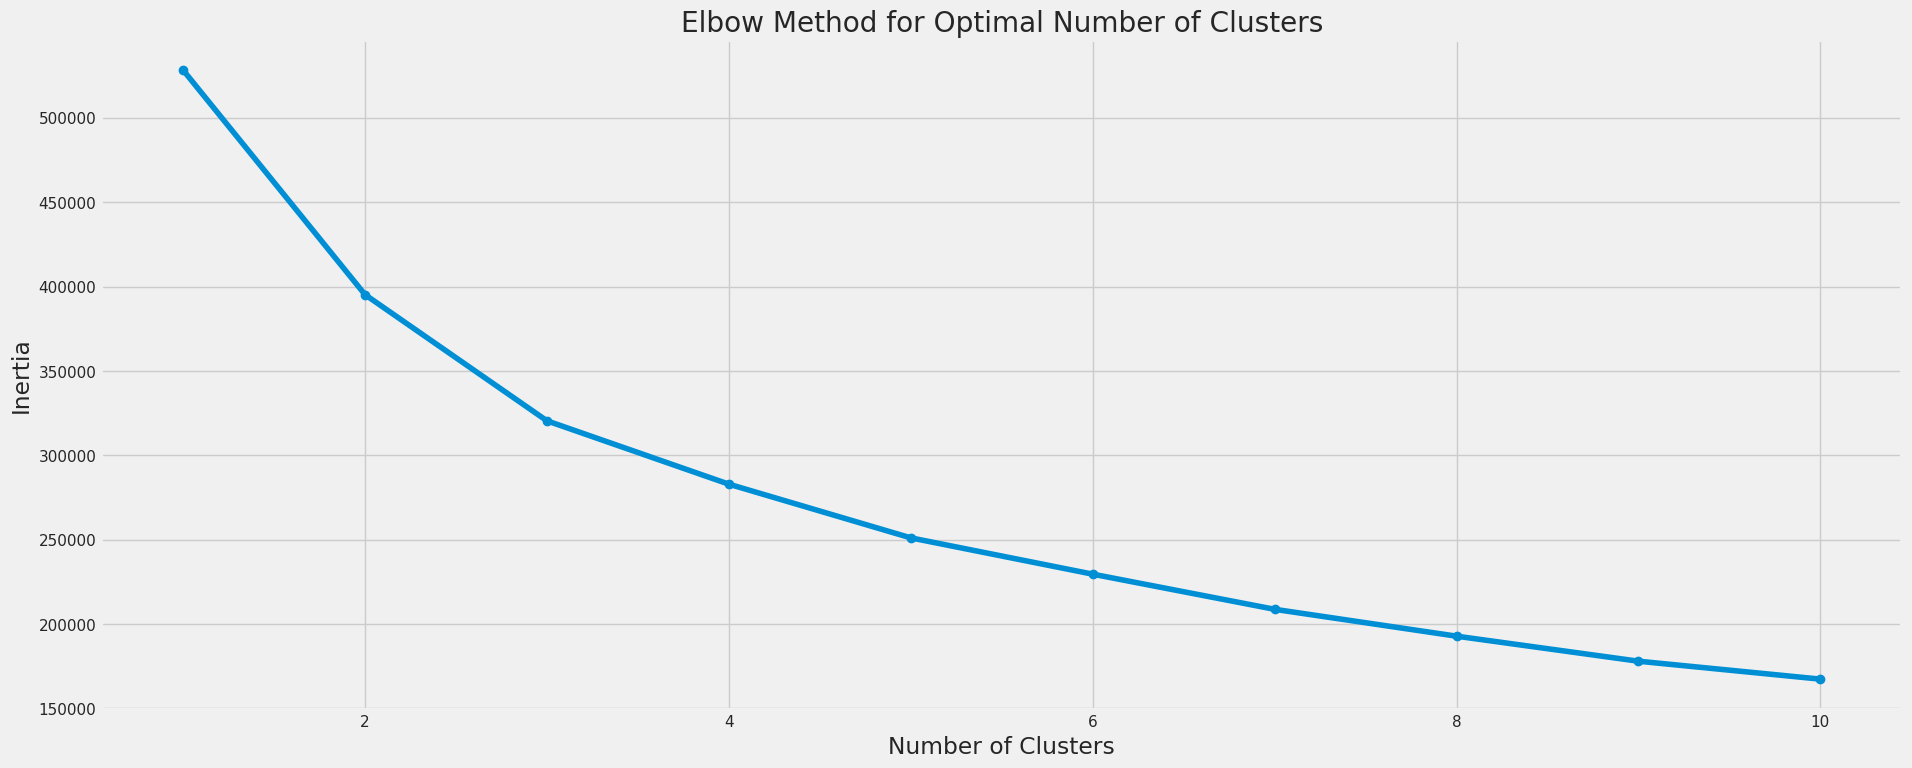

In [ ]:
# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_standardized)
    silhouette_scores.append(silhouette_score(X_standardized, labels))


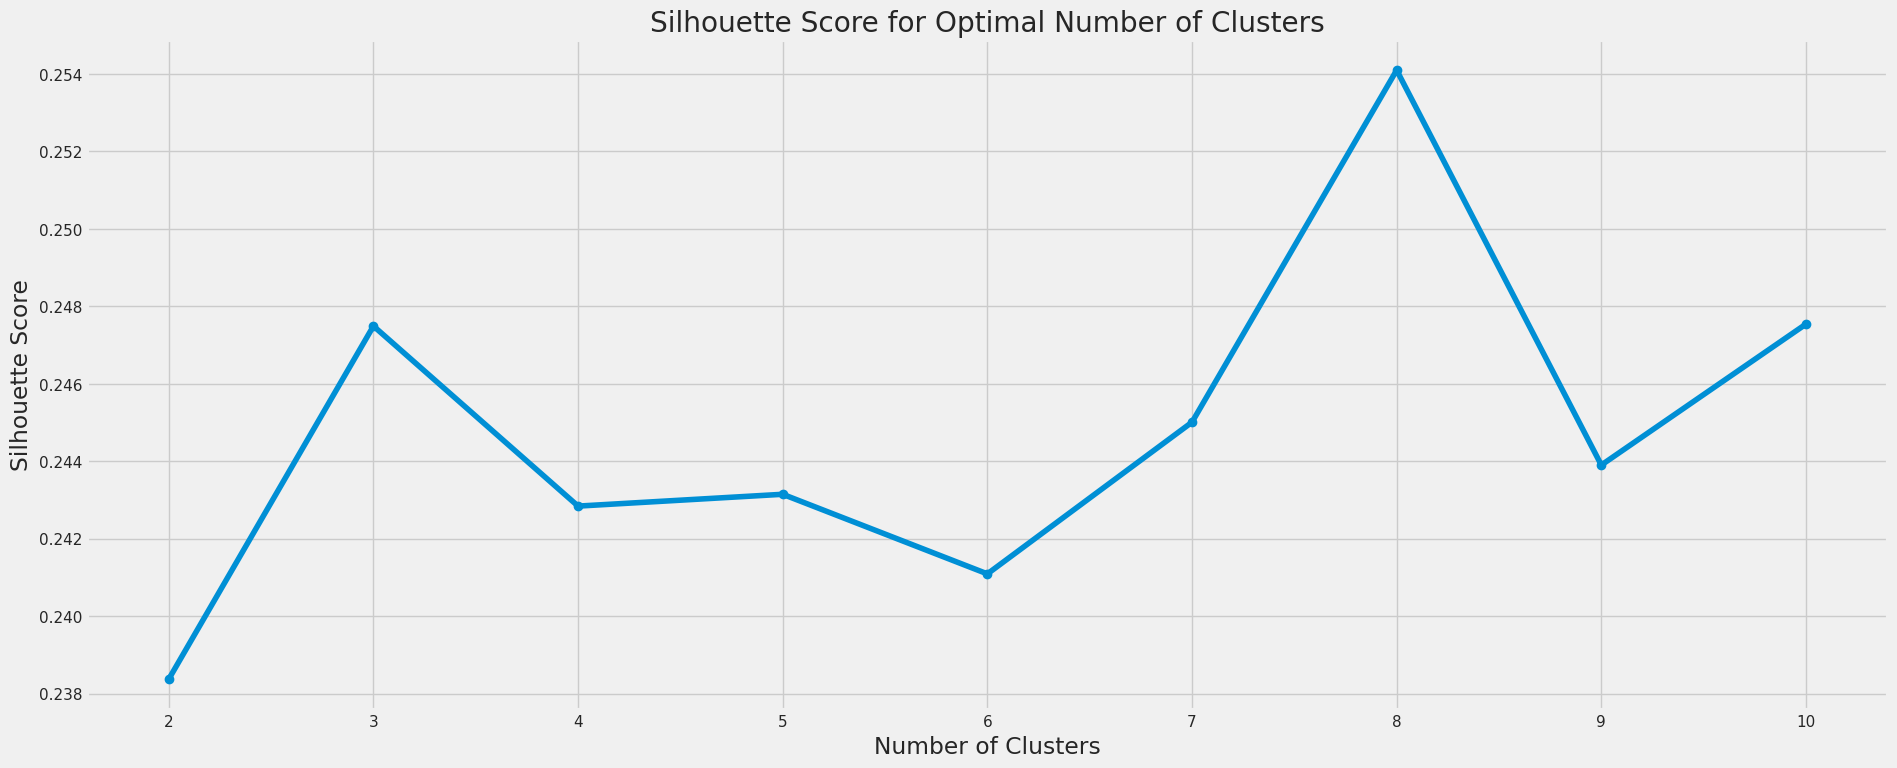

In [58]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

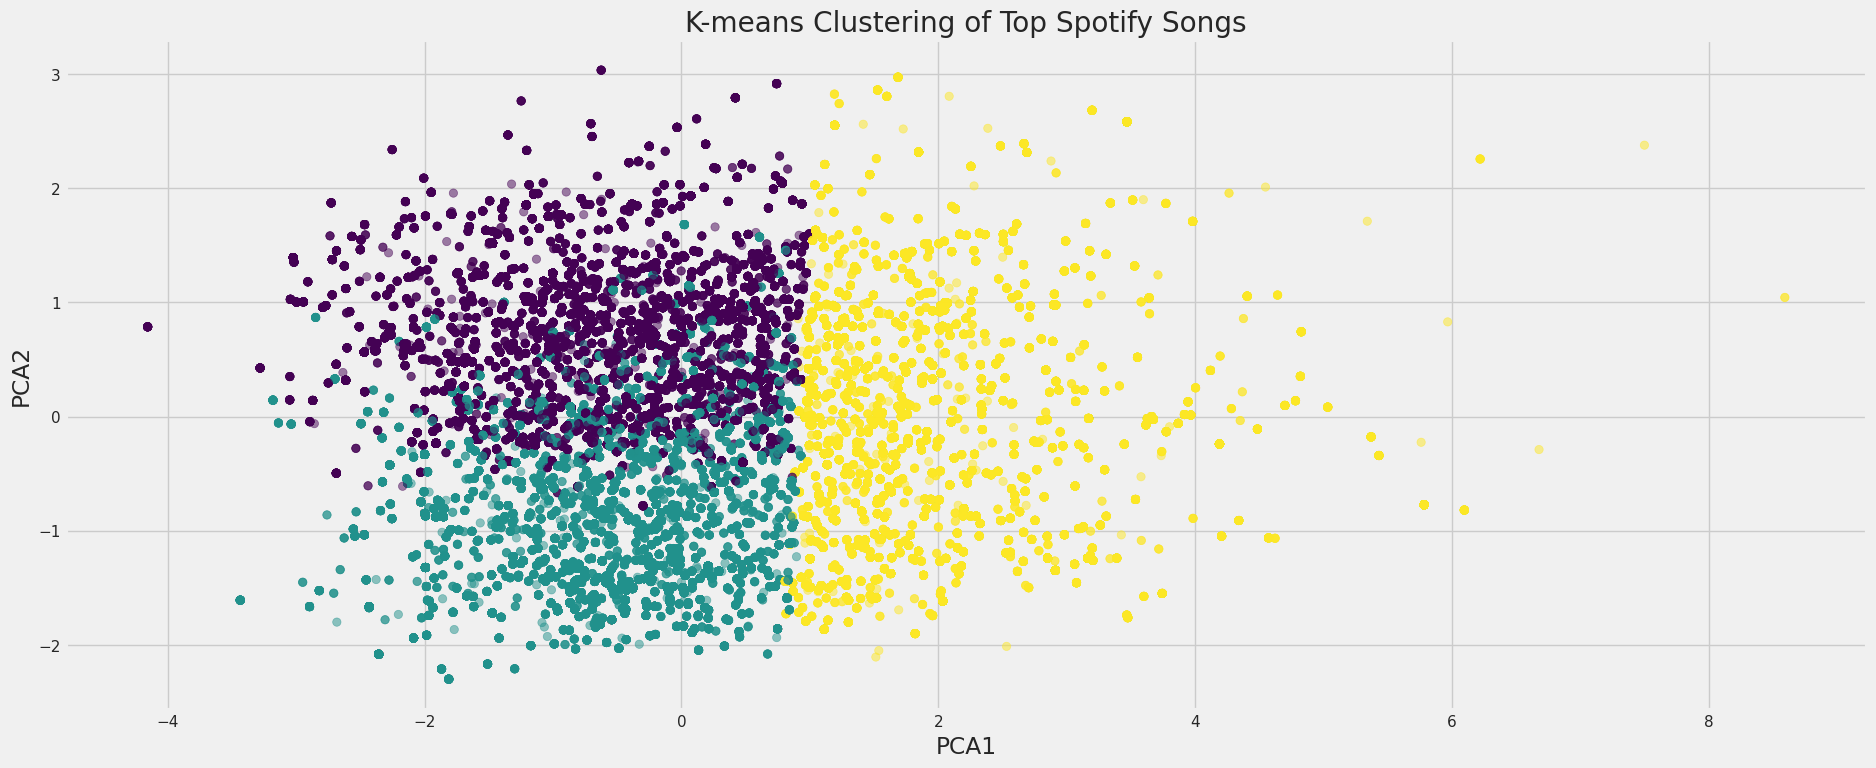

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_standardized)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters in 2D
plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Top Spotify Songs')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()



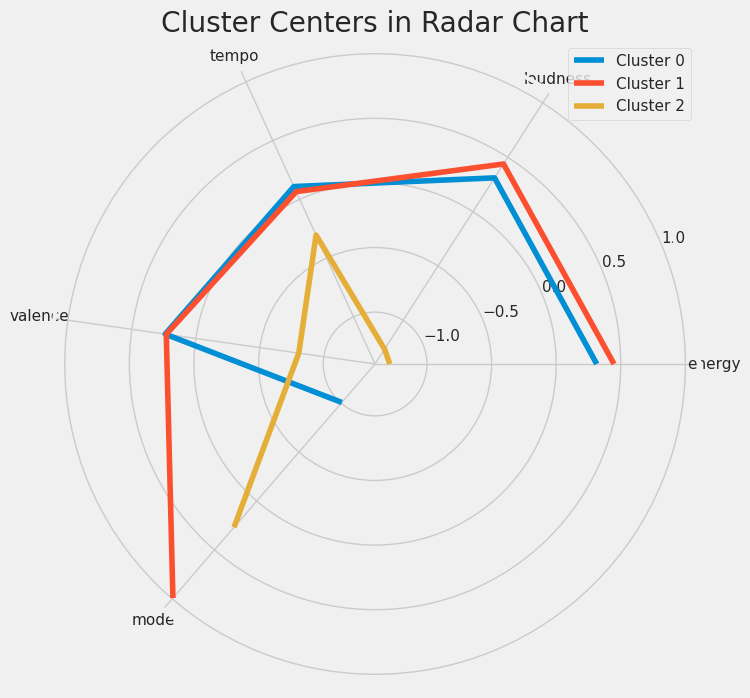

In [63]:
cluster_centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(num_clusters):
    ax.plot(range(len(features_of_interest)), cluster_centers[i], label=f'Cluster {i}')
ax.set_xticks(range(len(features_of_interest)))
ax.set_xticklabels(features_of_interest)
ax.legend(loc='upper right')
plt.title('Cluster Centers in Radar Chart')
plt.show()


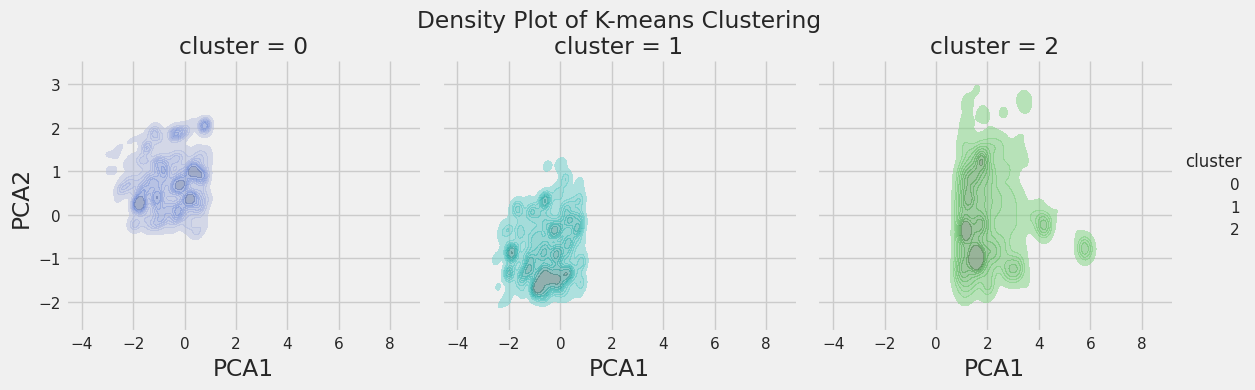

In [67]:
import seaborn as sns

# Create a FacetGrid with a scatter plot for each cluster
g = sns.FacetGrid(df, col="cluster", hue="cluster", palette="viridis", col_wrap=3, height=4)
g.map(sns.kdeplot, "PCA1", "PCA2", alpha=0.5, fill=True)
g.add_legend()
plt.suptitle('Density Plot of K-means Clustering')
plt.subplots_adjust(top=0.85)
plt.show()


In [ ]:
median_per_cluster = df.groupby('cluster')[features_of_interest].median()
print(median_per_cluster)

         energy  loudness    tempo  valence  mode
cluster                                          
0         0.706    -5.678  123.010   0.5690   0.0
1         0.720    -5.501  120.001   0.5745   1.0
2         0.441    -9.319  111.982   0.3240   1.0


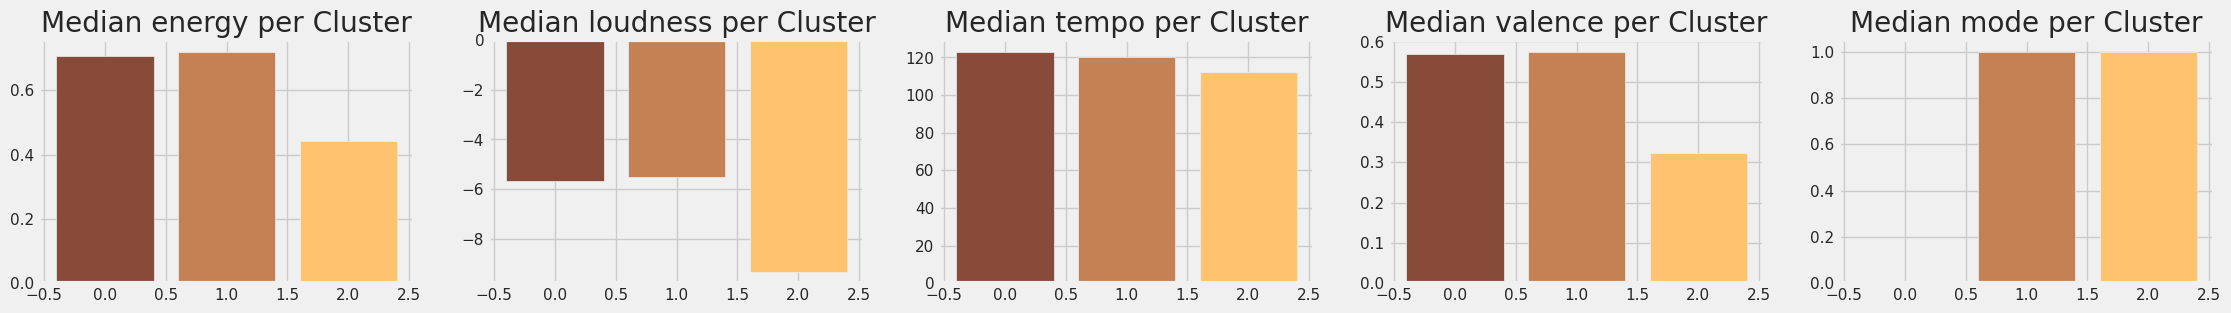

In [ ]:
# Define colors
colors = ["#884A39", "#C38154", "#FFC26F", "#F9E0BB"]

def dist_list(lst):
    plt.figure(figsize=[len(lst)*5, 3])
    i = 1
    for col in lst:
        ax = plt.subplot(1, len(lst), i)
        for idx, cluster in enumerate(median_per_cluster.index):
            ax.bar(idx, median_per_cluster.loc[cluster, col], color=colors[cluster])
        ax.set_title(f'Median {col} per Cluster')
        i += 1

# Example usage
dist_list(features_of_interest)
plt.show()

# Conclusion

Cluster 1 (Hard Rock) -> energy cukup tinggi, loudness cukup tinggi, tempo juga sangat tinggi, valence cukup tinggi, mode minor <br>
Cluster 2 (Glam Rock) -> energy sangat tinggi, loudness sangat tinggi, tempo cukup tinggi, valence sangat tinggi dan mode major <br>
Cluster 3 (Slowcore) -> energy sangat rendah, loudness sangat rendah, tempo sangat rendah, valence sangat rendah, mode major

Cluster 1 <br>
With high energy, loudness, tempo, and valence, as well as minor modes, this music most likely falls into the energetic and aggressive rock genre. One subgenre of rock that can include these features is Hard Rock.
Hard rock : Loud, energetic, and often fast-paced sound. Minor modes can also give the music a darker and more intense feel. Some famous hard rock bands such as AC/DC, Guns N' Roses, or Led Zeppelin often have the characteristics you mentioned.


Cluster 2 <br>
With very high energy, loudness, tempo, and valence, as well as major modes, this music may fit into some rock subgenres that have these elements. A subgenre that might fit these characteristics is  Glam Rock.    
Glam Rock: Tends to have glamorous, eccentric and stylish elements. Some glam rock bands like David Bowie or T. Rex can display high energy and an upbeat atmosphere.



Cluster 3 <br>
With its energy, loudness, tempo, very low valence, and major modes, these characteristics are more in line with some types of rock music that have a melancholic or introspective feel. One subgenre of rock that can include these features is Slowcore.  
Slowcore: Slow tempo, low dynamics, and often introspective atmosphere. Some slowcore bands such as Low or Codeine tend to display quiet and melancholic musical features.

